In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import and Subset 'Questions'

In [2]:
questions = pd.read_csv('questions.csv')
questions.rename(columns={'AskedByClientUno':'ClientUno'}, inplace=True) # rename so the merge works
questions = questions.loc[:,['ClientUno','Category']]

Import and Subset 'Clients'

In [3]:
clients = pd.read_csv('clients.csv')
clients = clients.iloc[:,1:]
clients['EthnicIdentity'].replace('Hispanic or Latino','Latino or Hispanic', inplace=True)

Merge the two datasets on 'ClientUno'

In [4]:
cli_ques = clients.merge(questions, how='inner', on='ClientUno')

Remove any Clients who asked more than 1 question

In [5]:
cli_ques.drop_duplicates(subset='ClientUno', keep=False, inplace=True)
cli_ques.reset_index(drop=True, inplace=True)

Investigate NaN values

In [6]:
cli_ques.isna().sum()

StateAbbr                  0
ClientUno                  0
County                   178
StateName                  0
PostalCode             12582
EthnicIdentity         24629
Age                    12884
Gender                 23889
MaritalStatus          24163
Veteran                28148
Imprisoned             12483
NumberInHousehold      12483
AnnualIncome           12499
AllowedIncome          12483
CheckingBalance        47659
SavingsBalance        104791
InvestmentsBalance    152083
CreatedUtc                 0
Category                   0
dtype: int64

In [7]:
cli_ques.drop(['SavingsBalance','InvestmentsBalance','CreatedUtc'], axis=1, inplace=True)

Mean and Median Grouped by Category (Numeric Variables)

In [8]:
cli_ques.loc[:,['Category','Age','NumberInHousehold','AnnualIncome','AllowedIncome','CheckingBalance']] \
    .groupby('Category', axis=0).agg(['mean','median'])

Age        NumberInHousehold         \
                                        mean median              mean median   
Category                                                                       
Consumer Financial Questions       43.008831   41.0          2.658613    2.0   
Education                          36.366483   36.0          3.492647    3.0   
Family and Children                37.494154   35.0          3.039795    3.0   
Health and Disability              45.751592   44.0          2.392271    2.0   
Housing and Homelessness           41.100888   39.0          2.630380    2.0   
Income Maintenance                 44.896628   44.0          2.518987    2.0   
Individual Rights                  39.502431   37.0          2.711765    2.0   
Juvenile                           36.677570   37.0          3.306977    3.0   
Other                              41.531879   40.0          2.647908    2.0   
Work, Employment and Unemployment  38.884489   37.0          2.593405    2.0   

                                    AnnualIncome          AllowedIncome  \
                                            mean   median          mean   
Category                                                                  
Consumer Financial Questions        24657.231993  23000.0  36153.124650   
Education                           24963.257574  22102.0  48965.882353   
Family and Children                 23623.160474  20000.0  40945.523346   
Health and Disability               21267.313293  18020.0  32865.373213   
Housing and Homelessness            21499.084931  20000.0  35593.534004   
Income Maintenance                  17110.514133  14000.0  33919.936709   
Individual Rights                   18988.848115  16000.0  36411.835640   
Juvenile                            21671.948837  20000.0  45817.720930   
Other                               21167.935341  19167.0  35569.654110   
Work, Employment and Unemployment  153802.273627  20000.0  35641.207961   

                                           CheckingBalance         
                                    median            mean median  
Category                                                           
Consumer Financial Questions       27750.0      566.607831  145.0  
Education                          48990.0      601.835766  146.0  
Family and Children                37190.0      439.582328  100.0  
Health and Disability              25390.0     1472.588026  200.0  
Housing and Homelessness           27750.0      642.959215  123.0  
Income Maintenance                 25390.0      581.274365  100.0  
Individual Rights                  27750.0      580.953512  120.0  
Juvenile                           37190.0      348.634247  100.0  
Other                              27750.0      644.761041  130.0  
Work, Employment and Unemployment  27750.0      745.583312  200.0

Mode Grouped by Category (Categorical Variables)

In [9]:
cli_ques.loc[:,['Category','StateAbbr','EthnicIdentity','Gender','MaritalStatus','Veteran','Imprisoned']] \
    .groupby('Category', axis=0).agg(pd.Series.mode)

,StateAbbr,EthnicIdentity,Gender,MaritalStatus,Veteran,Imprisoned
Category,,,,,,
Consumer Financial Questions,IN,Caucasian,Female,Single,No,No
Education,SC,Caucasian,Female,Single,No,No
Family and Children,IN,Caucasian,Female,Single,No,No
Health and Disability,TX,Caucasian,Female,Single,No,No
Housing and Homelessness,FL,Caucasian,Female,Single,No,No
Income Maintenance,MA,Caucasian,Female,Single,No,No
Individual Rights,FL,Caucasian,Female,Single,No,No
Juvenile,IN,Caucasian,Female,Single,No,No
Other,TX,Caucasian,Female,Single,No,No


Lets create a pair of similar tables for clients in MO.

In [10]:
cli_ques_MO = cli_ques[cli_ques['StateAbbr']=='MO']

In [11]:
cli_ques_MO.loc[:,['Category','Age','NumberInHousehold','AnnualIncome','AllowedIncome','CheckingBalance']] \
    .groupby('Category', axis=0).agg(['mean','median'])

Age        NumberInHousehold         \
                                        mean median              mean median   
Category                                                                       
Consumer Financial Questions       44.203103   43.0          2.544429    2.0   
Education                          36.015625   36.5          3.328125    3.5   
Family and Children                38.378958   36.0          2.954609    3.0   
Health and Disability              44.007937   42.0          2.420635    2.0   
Housing and Homelessness           41.778592   39.0          2.636364    2.0   
Income Maintenance                 47.527027   49.0          2.054054    2.0   
Individual Rights                  40.791506   39.0          2.698842    2.0   
Juvenile                           40.117647   44.0          3.470588    3.0   
Other                              41.488253   39.0          2.596527    2.0   
Work, Employment and Unemployment  39.873134   38.0          2.674129    2.0   

                                   AnnualIncome          AllowedIncome  \
                                           mean   median          mean   
Category                                                                 
Consumer Financial Questions       24987.859972  24000.0  42748.815233   
Education                          26916.765625  22608.0  57545.000000   
Family and Children                20540.406344  18000.0  50493.026038   
Health and Disability              21776.976190  18000.0  40411.587302   
Housing and Homelessness           21046.786496  19000.0  44484.545455   
Income Maintenance                 14764.851351  10280.0  33490.540541   
Individual Rights                  17619.487614  14000.0  45664.131274   
Juvenile                           30492.705882  20000.0  60234.705882   
Other                              19717.420964  15000.0  43732.431052   
Work, Employment and Unemployment  23304.922886  20000.0  45197.562189   

                                           CheckingBalance         
                                    median            mean median  
Category                                                           
Consumer Financial Questions       32470.0      496.936508  100.0  
Education                          60790.0      506.943333  125.0  
Family and Children                51350.0      549.897355   89.0  
Health and Disability              32470.0     1296.229623  200.0  
Housing and Homelessness           32470.0      738.319969  100.0  
Income Maintenance                 32470.0      602.732830  100.0  
Individual Rights                  32470.0      408.970976  100.0  
Juvenile                           51350.0      587.781538  200.0  
Other                              32470.0      547.434331  100.0  
Work, Employment and Unemployment  32470.0      723.899310  200.0

In [12]:
cli_ques_MO.loc[:,['Category','StateAbbr','EthnicIdentity','Gender','MaritalStatus','Veteran','Imprisoned']] \
    .groupby('Category', axis=0).agg(pd.Series.mode)

,StateAbbr,EthnicIdentity,Gender,MaritalStatus,Veteran,Imprisoned
Category,,,,,,
Consumer Financial Questions,MO,Caucasian,Female,Single,No,No
Education,MO,Caucasian,Female,Single,No,No
Family and Children,MO,Caucasian,Female,Single,No,No
Health and Disability,MO,Caucasian,Female,Single,No,No
Housing and Homelessness,MO,Caucasian,Female,Single,No,No
Income Maintenance,MO,Caucasian,Female,Single,No,No
Individual Rights,MO,Caucasian,Female,Single,No,No
Juvenile,MO,Caucasian,Female,"[Married / remarried, Single]",No,No
Other,MO,Caucasian,Female,Single,No,No


The following features appear most interesting:  

NumberInHousehold  
Age  
AnnualIncome  
AllowedIncome  
EthnicIdentity  
MaritalStatus  
Gender  

Let's check out their distributions.

### NumberInHousehold

In [13]:
cli_ques_MO1 = cli_ques_MO[cli_ques_MO['NumberInHousehold']<15] # eliminate extreme outliers

<Figure size 1000x500 with 0 Axes>

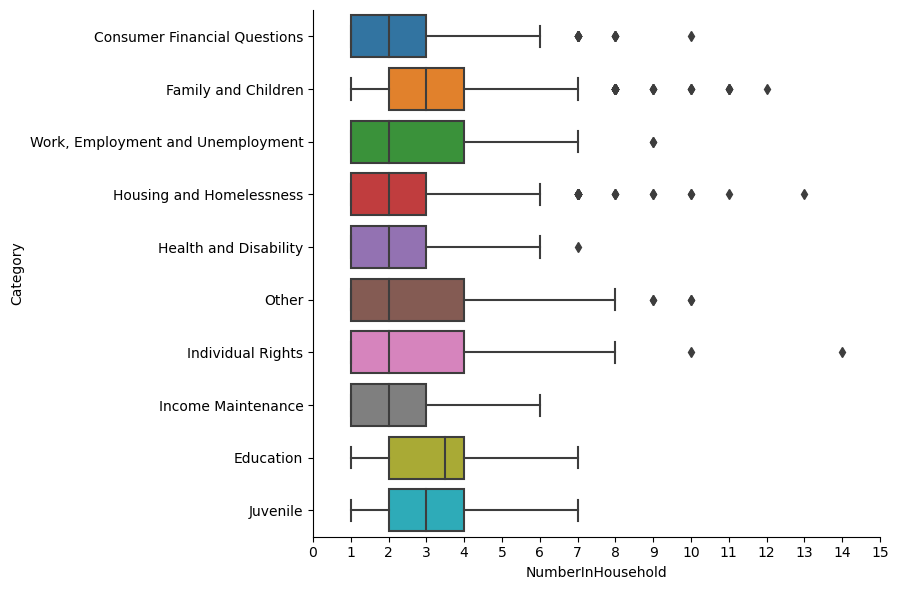

In [14]:
plt.figure(figsize=(10,5))
sns.catplot(data=cli_ques_MO1, x='NumberInHousehold', y='Category', kind='box', height=6, aspect=1.5)
plt.xticks(np.arange(0,16,1))
plt.savefig('NumberInHousehold.jpg', dpi=300)
plt.show()

### Age

<Figure size 1000x500 with 0 Axes>

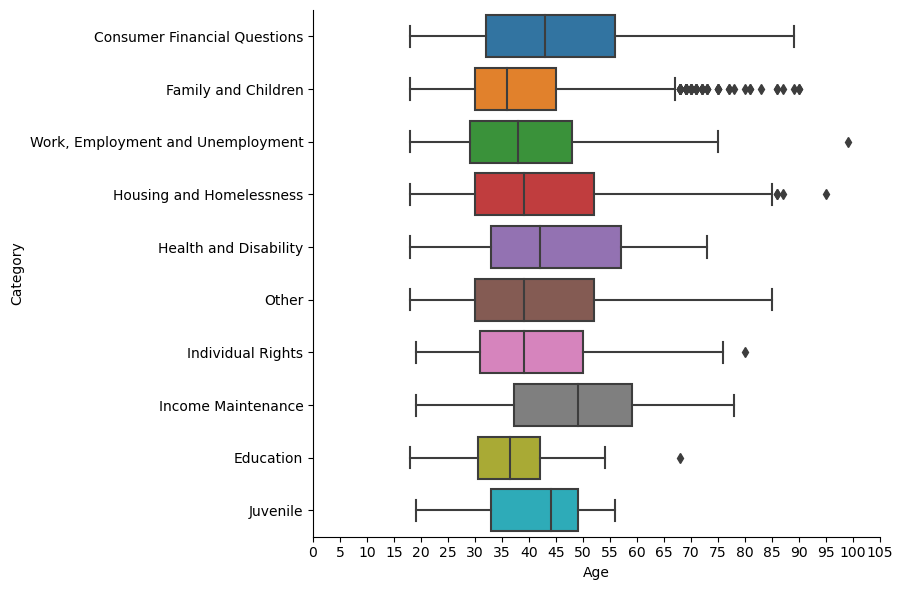

In [15]:
plt.figure(figsize=(10,5))
sns.catplot(data=cli_ques_MO, x='Age', y='Category', kind='box', height=6, aspect=1.5)
plt.xticks(np.arange(0,106,5))
plt.savefig('Age.jpg', dpi=300)
plt.show()

### AnnualIncome

In [16]:
cli_ques_MO2 = cli_ques_MO[cli_ques_MO['AnnualIncome']<125000] # eliminate extreme outliers

<Figure size 1000x500 with 0 Axes>

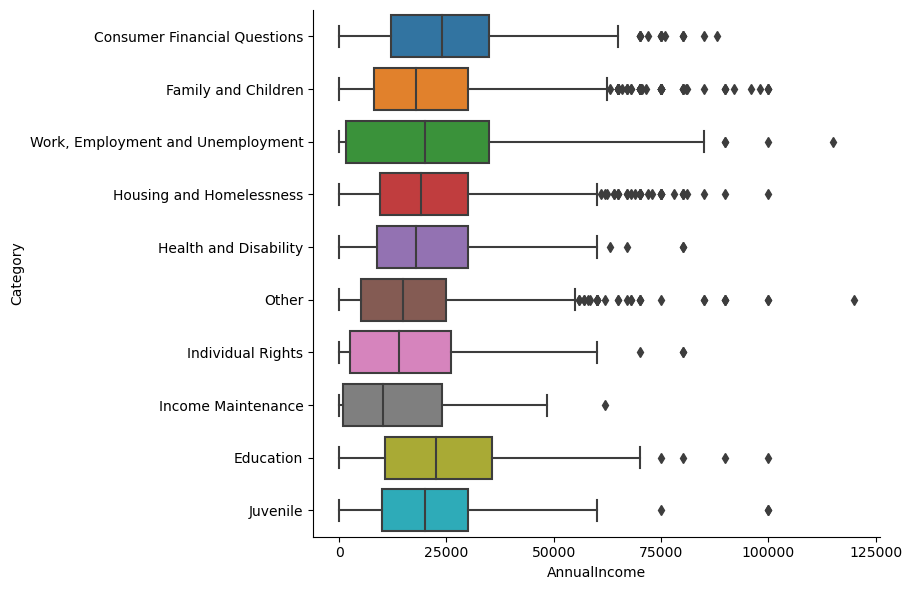

In [17]:
plt.figure(figsize=(10,5))
sns.catplot(data=cli_ques_MO2, x='AnnualIncome', y='Category', kind='box', height=6, aspect=1.5)
plt.xticks(np.arange(0,125001,25000))
plt.savefig('AnnualIncome.jpg', dpi=300)
plt.show()

### AllowedIncome

In [18]:
cli_ques_MO3 = cli_ques_MO[cli_ques_MO['AllowedIncome']<200000] # eliminate extreme outliers

<Figure size 1000x500 with 0 Axes>

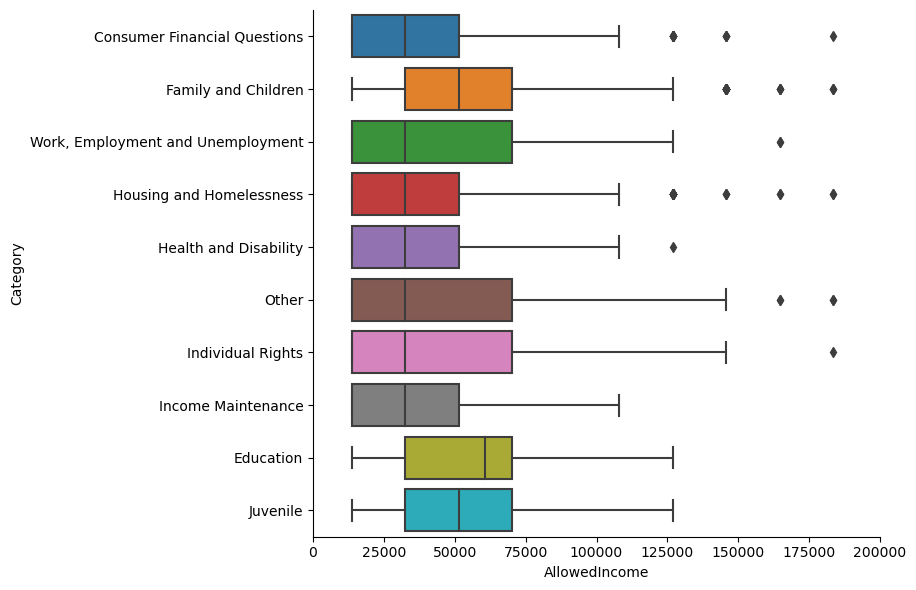

In [19]:
plt.figure(figsize=(10,5))
sns.catplot(data=cli_ques_MO3, x='AllowedIncome', y='Category', kind='box', height=6, aspect=1.5)
plt.xticks(np.arange(0,200001,25000))
plt.savefig('AllowedIncome.jpg', dpi=300)
plt.show()

### EthnicIdentity

Note: 'caucasian' dominates every category, so it has been omitted to display the distribution among the next 10 most frequent categories  
'Not Hispanic or Latino' has also been omitted because it is equal to the sum of other categories

In [20]:
eth_counts = cli_ques_MO.EthnicIdentity.value_counts()[1:12]
eths = list(eth_counts.index)
eths.remove('Not Hispanic or Latino')
cli_ques_MO4 = cli_ques_MO[cli_ques_MO['EthnicIdentity'].isin(eths)]

<Figure size 500x5000 with 0 Axes>

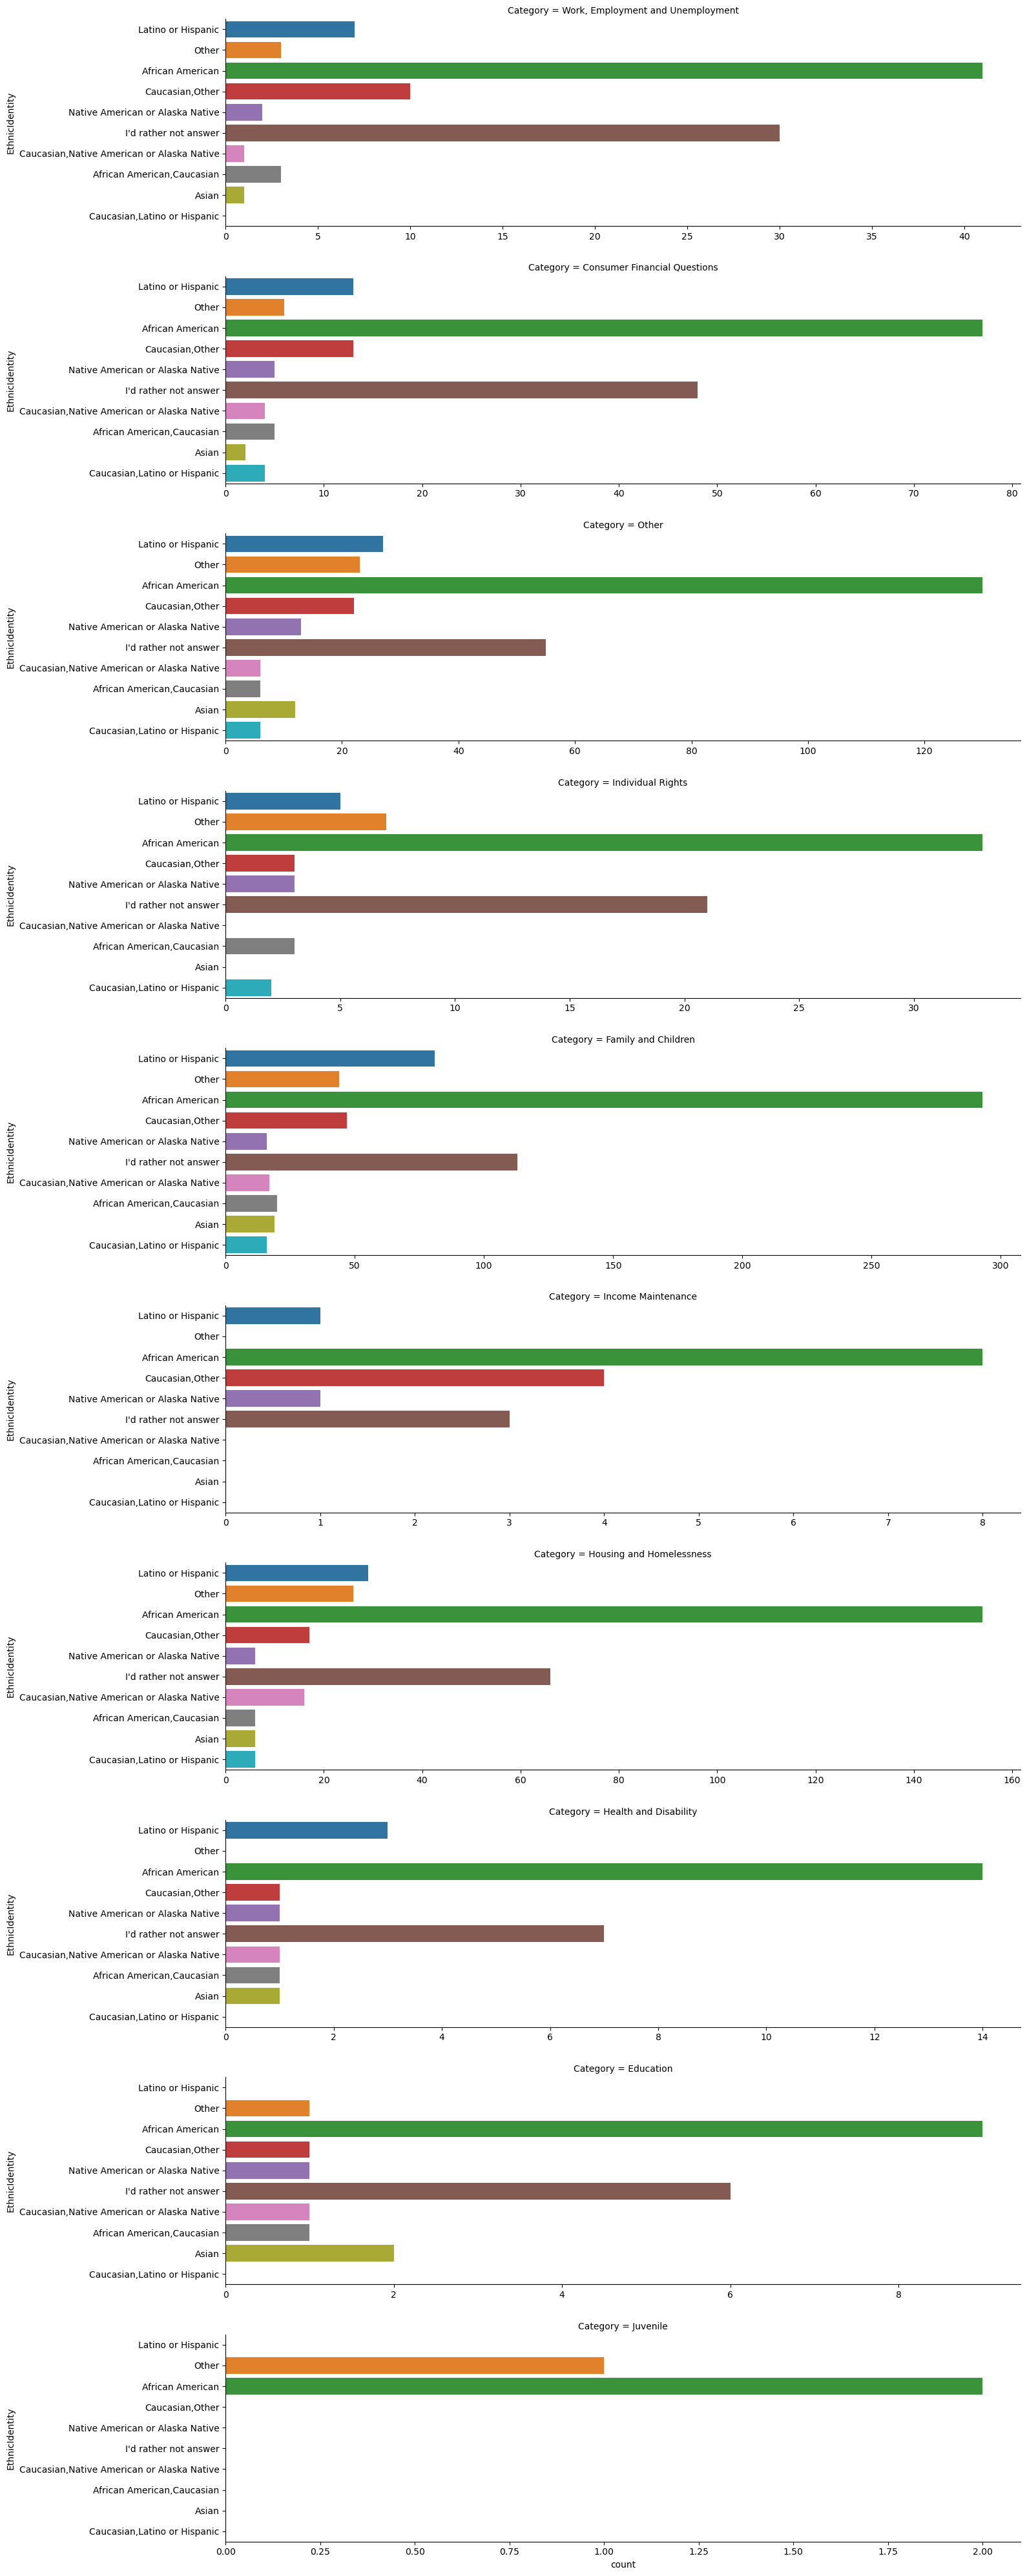

In [21]:
plt.figure(figsize=(5,50))
sns.catplot(data=cli_ques_MO4, y='EthnicIdentity', row='Category', kind='count', height=4, aspect=4, sharex=False)
plt.savefig('EthnicIdentity.jpg', dpi=300)
plt.show()

### MaritalStatus

<Figure size 500x5000 with 0 Axes>

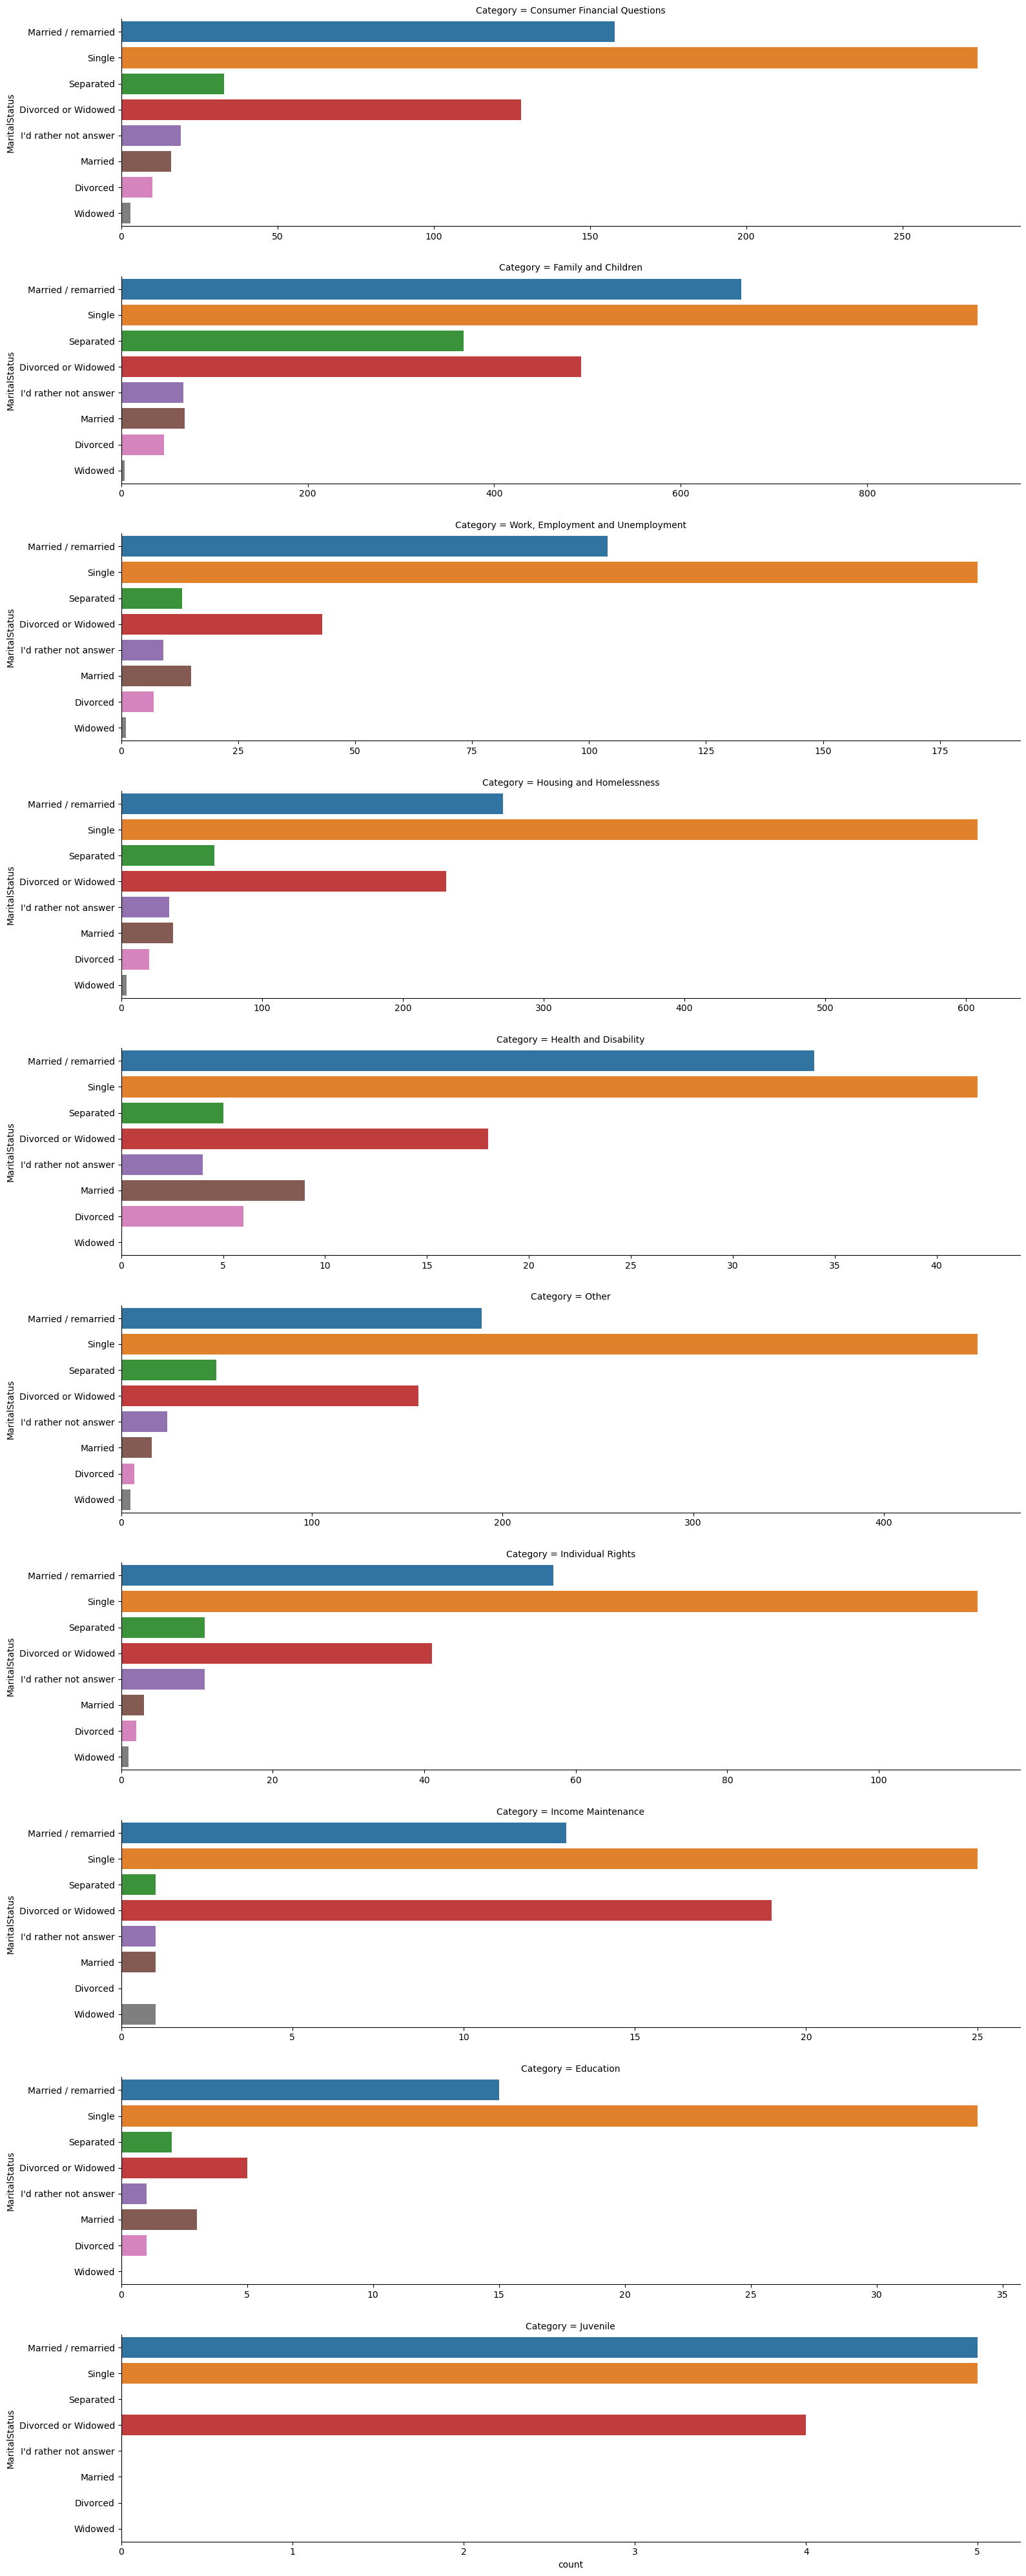

In [22]:
plt.figure(figsize=(5,50))
sns.catplot(data=cli_ques_MO, y='MaritalStatus', row='Category', kind='count', height=4, aspect=4, sharex=False)
plt.savefig('MaritalStatus.jpg', dpi=300)
plt.show()

### Gender

In [23]:
cli_ques_MO5 = cli_ques_MO[cli_ques_MO['Gender']!='Non-Conforming'] # this category is so small it cannot be seen in hist

<Figure size 500x1000 with 0 Axes>

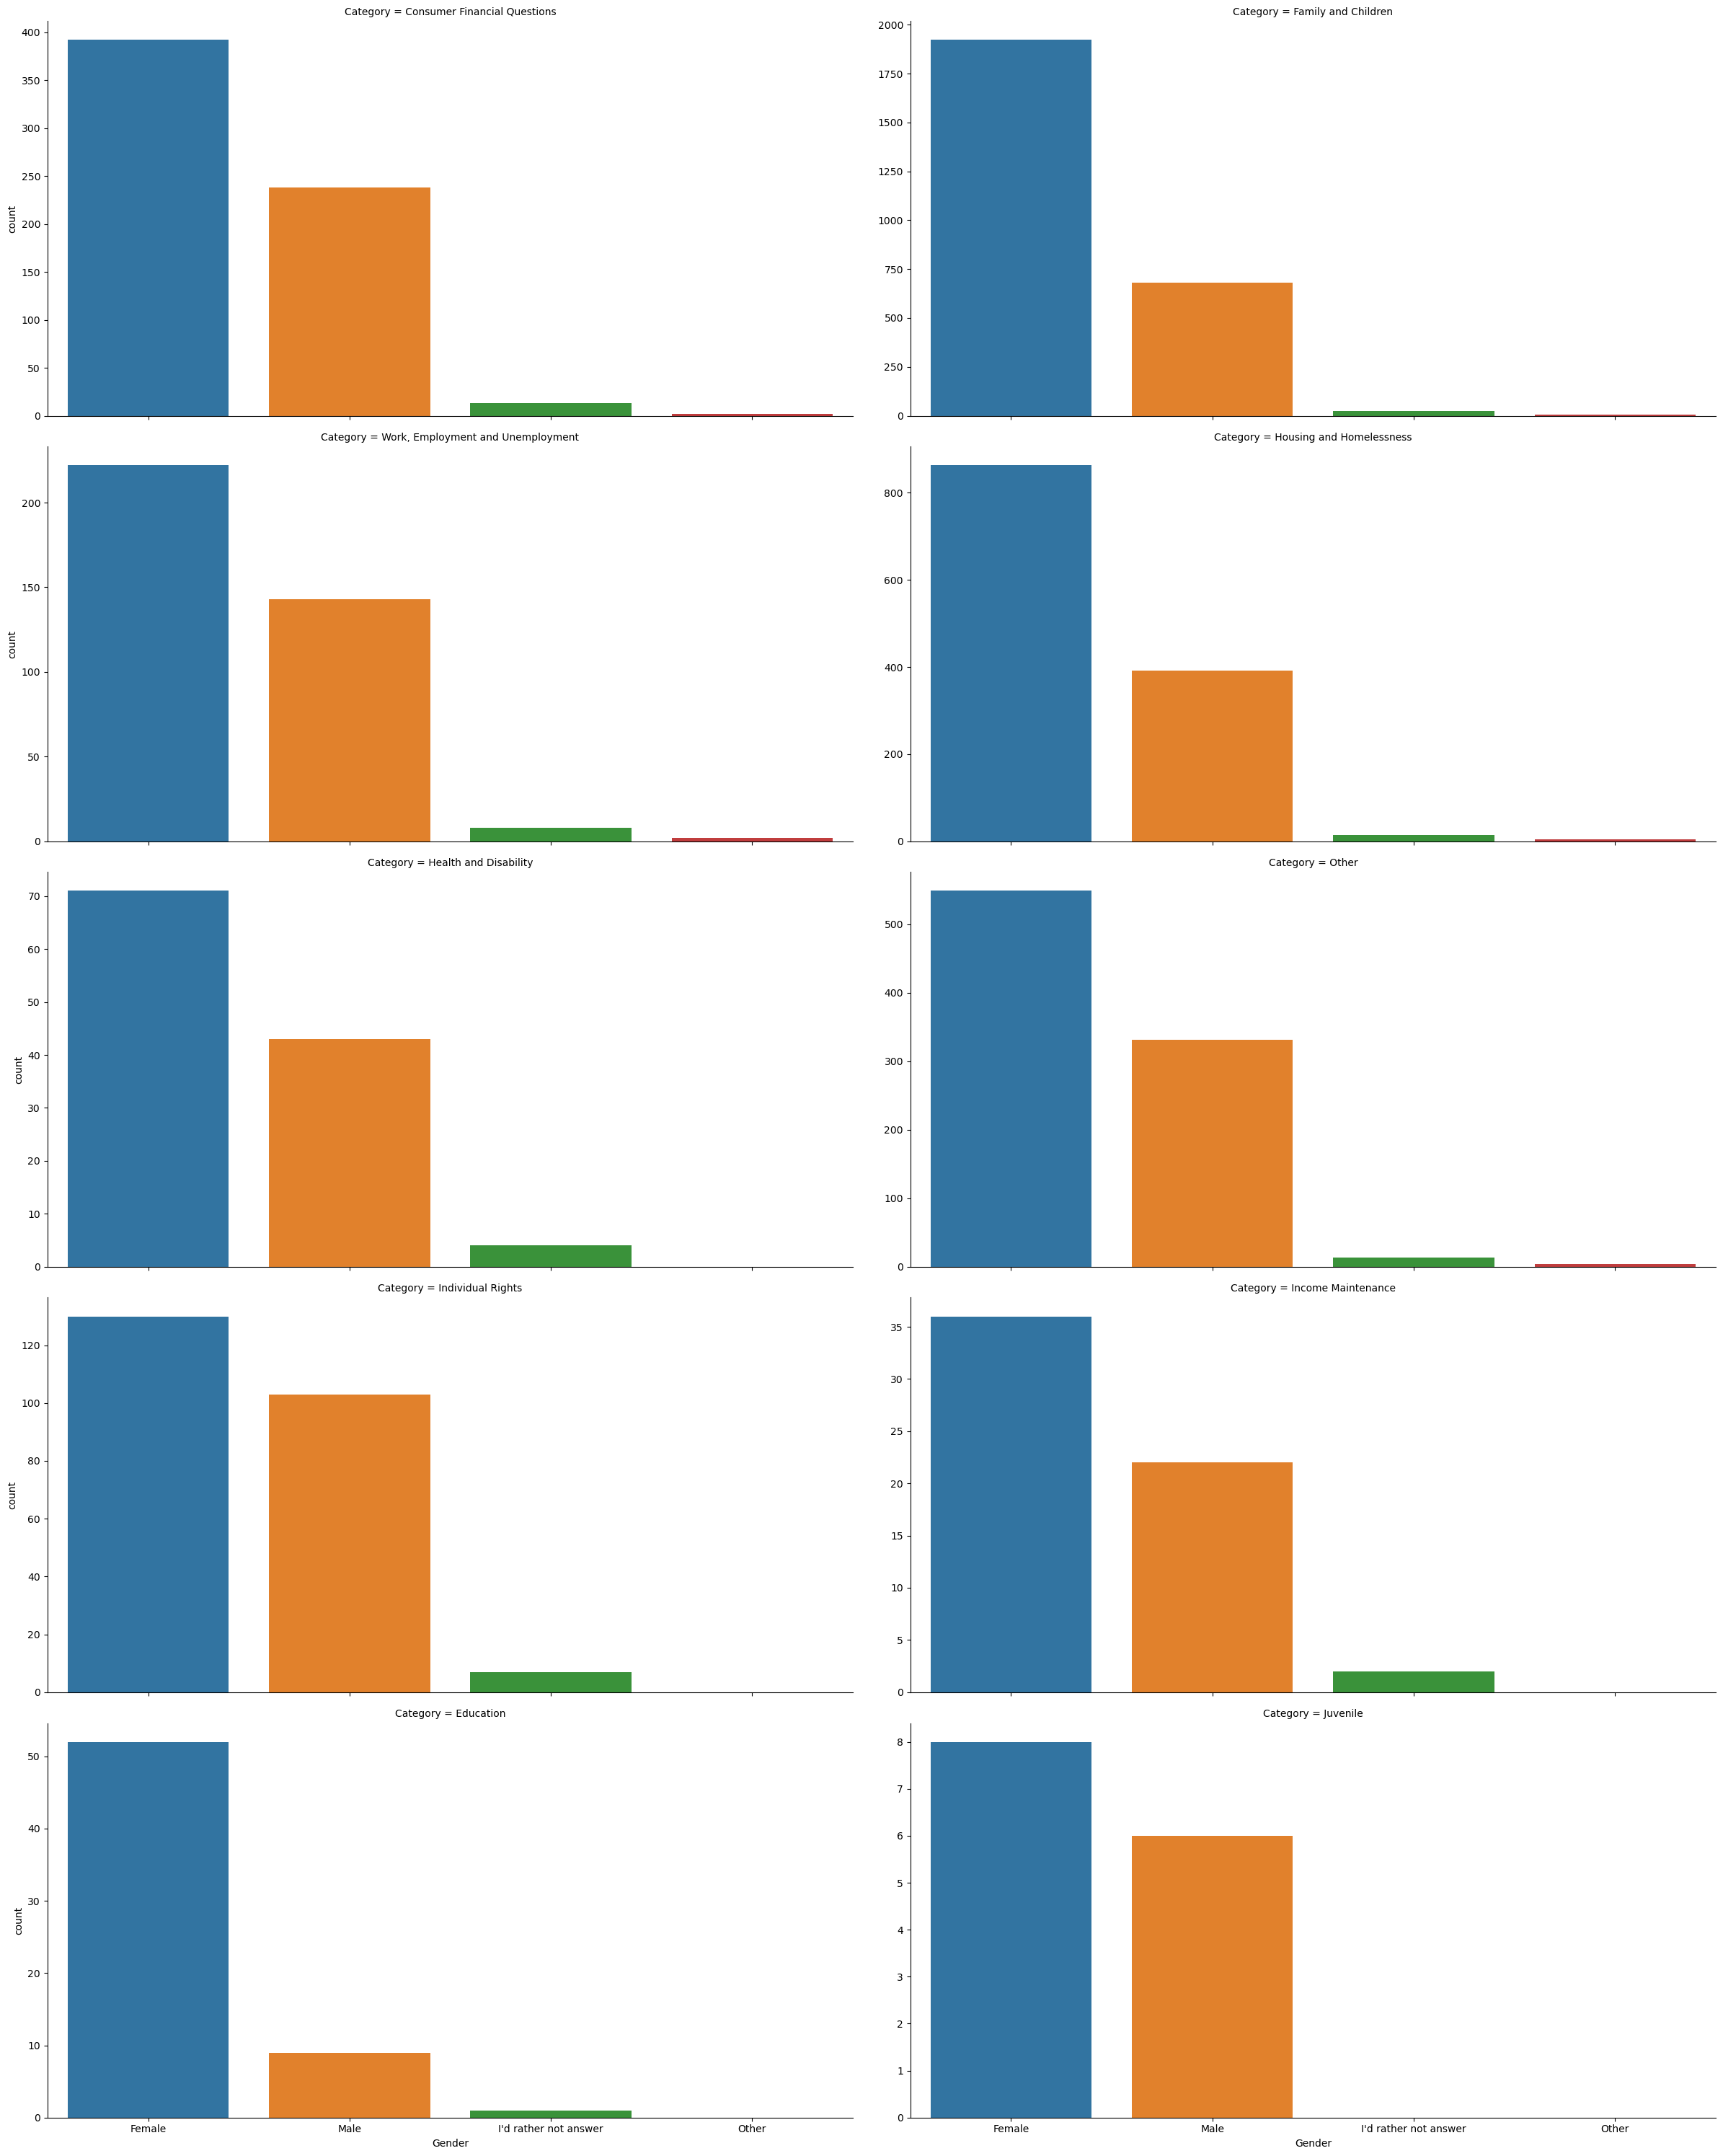

In [24]:
plt.figure(figsize=(5,10))
sns.catplot(data=cli_ques_MO5, x='Gender', col='Category', kind='count', height=6, aspect=2, sharey=False, col_wrap=2)
plt.savefig('Gender.jpg', dpi=300)
plt.show()